# Imports

In [35]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

from google.colab import drive

# Global Variables

In [101]:
save_dir = "/content/drive/MyDrive/Classes/CSCE 5280 AI for Wearables/Group Project 2/Results/"      # Mica dir
tracker_dir = save_dir + "trackers/"
bar_dir = save_dir + "tracker_bar_plots/"
hist_plot_dir = save_dir + "hist_plots/"

model_archetypes = ["dense"] #, "conv"]
model_types_df = ["naive", "initial_target", "transfer_target"] #, "initial_comb", "transfer_comb"]
model_types_plot = ["naive", "target"] #, "comb"]
test_sets = ["target"]# , "comb"]
metrics = ["precision", "recall", "f1", "accuracy", "loss"]
hist_metrics = ["accuracy", "val_accuracy", "loss", "val_loss"]
hist_metrics_title = ["Accuracy", "Val. Accuracy", "Loss", "Val Loss"]

colors = ["magenta", 
          "steel blue", 
          "red", 
          "light navy blue", 
          "pumpkin", 
          "sky blue", 
          "goldenrod", 
          "green", 
          "light purple", 
          "kelly green",
          "faded red",  
          "teal", 
          "lavender", 
          "turquoise", 
          "azure",
          "light orange",  
          "cerulean", 
          "rose",
          "periwinkle", 
          "sea green", 
          ]
colors = ["xkcd:%s"%(x) for x in colors]
# labels = None

# Load Data

In [3]:
if not os.path.exists("drive/"):
    drive.mount('/content/drive')

## Trackers

In [4]:
trackers = {}
for (r, d, files) in os.walk(tracker_dir):
    for f in files:
        try:
            tmp = pd.read_csv(tracker_dir + f)
            trackers.update({f.split(".")[0]: tmp})
        except:
            continue

In [5]:
trackers.keys()

dict_keys(['001_baseline_dense', '002_drop_learning_rate_1_dense', '003_drop_learning_rate_2_dense', '004_raise_learning_rate_1_dense', '005_raise_num_unfrozen_1_dense', '006_raise_num_unfrozen_2_dense', '007_raise_num_unfrozen_3_dense', '008_raise_num_unfrozen_4_dense', '009_raise_num_unfrozen_5_dense', '010_raise_num_unfrozen_6_dense', '011_raise_num_unfrozen_7_dense', '012_data_vs_score_keep_5_dense', '013_data_vs_score_keep_10_dense', '014_data_vs_score_keep_15_dense', '030_data_vs_score_keep_95_dense', '031_data_vs_score_keep_100_dense', '035_data_vs_score_keep_120_dense', '036_data_vs_score_keep_125_dense', '037_data_vs_score_keep_130_dense', '033_data_vs_score_keep_110_dense', '032_data_vs_score_keep_105_dense', '015_data_vs_score_keep_20_dense', '034_data_vs_score_keep_115_dense', '025_data_vs_score_keep_70_dense', '016_data_vs_score_keep_25_dense', '039_data_vs_score_keep_140_dense', '038_data_vs_score_keep_135_dense', '024_data_vs_score_keep_65_dense', '017_data_vs_score_keep

## Histories

In [6]:
def get_avgs(f, save_dir, n_runs):
    avgs = {}

    # Load file
    with open(save_dir + "histories/" + f, "rb") as file:
        d = pickle.load(file)
        for m in d:
            if "comb" in m:
                continue

            # Get averages
            avgs.update({m: {}})
            for s in ["accuracy", "val_accuracy", "loss", "val_loss"]:
                l = len(d[m][0].history["loss"])
                avgs[m].update({s: np.zeros(l).tolist()})
                for r in range(n_runs):
                    avgs[m][s] = [sum(x) for x in zip(avgs[m][s], d[m][r].history[s])]
                avgs[m][s] = [x/n_runs for x in avgs[m][s]]

    return avgs

In [7]:
def load_hists(save_dir, n_runs):
    vals = {}
    for (r, d, files) in os.walk(save_dir + "histories/"):
        for i, f in enumerate(files):
            print(i+1, " ", f)

            # File name
            fn = f.split(".")[0]
            fn = fn.split("_")
            exp_name = "_".join(fn[:-1])
            a_type = fn[-1]

            # Get averages
            avgs = get_avgs(f, save_dir, n_runs)

            # Update vals
            vals.update({exp_name: {"dense": avgs}})
            
    return vals

In [8]:
# Load
n_runs = 5
vals = load_hists(save_dir, n_runs)
# vals = {}
# for (r, d, files) in os.walk(save_dir + "histories/"):
#     for i, f in enumerate(files):
#         print(i+1, " ", f)

#         # File name
#         fn = f.split(".")[0]
#         fn = fn.split("_")
#         exp_name = "_".join(fn[:-1])
#         a_type = fn[-1]

#         # Get averages
#         avgs = get_avgs(f, save_dir, n_runs)

#         # Update vals
#         vals.update({exp_name: {"dense": avgs}})

# View
for k1 in vals:
    print(k1)
    for k2 in vals[k1]:
        print("\t", k2)
        for k3 in vals[k1][k2]:
            print("\t\t", k3)
            for k4 in vals[k1][k2][k3]:
                print("\t\t\t", k4)
                print("\t\t\t\t", vals[k1][k2][k3][k4])

1   001_baseline_dense.pickle
2   002_drop_learning_rate_1_dense.pickle
3   003_drop_learning_rate_2_dense.pickle
4   004_raise_learning_rate_1_dense.pickle
5   005_raise_num_unfrozen_1_dense.pickle
6   006_raise_num_unfrozen_2_dense.pickle
7   007_raise_num_unfrozen_3_dense.pickle
8   008_raise_num_unfrozen_4_dense.pickle
9   009_raise_num_unfrozen_5_dense.pickle
10   010_raise_num_unfrozen_6_dense.pickle
11   011_raise_num_unfrozen_7_dense.pickle
12   030_data_vs_score_keep_95_dense.pickle
13   015_data_vs_score_keep_20_dense.pickle
14   014_data_vs_score_keep_15_dense.pickle
15   013_data_vs_score_keep_10_dense.pickle
16   012_data_vs_score_keep_5_dense.pickle
17   031_data_vs_score_keep_100_dense.pickle
18   032_data_vs_score_keep_105_dense.pickle
19   033_data_vs_score_keep_110_dense.pickle
20   035_data_vs_score_keep_120_dense.pickle
21   036_data_vs_score_keep_125_dense.pickle
22   034_data_vs_score_keep_115_dense.pickle
23   025_data_vs_score_keep_70_dense.pickle
24   016_data_

In [12]:
keys = [x for x in sorted(list(trackers.keys()))]
for t in keys:
    print(t)
    # print(trackers[t])
    # break

001_baseline_dense
002_drop_learning_rate_1_dense
003_drop_learning_rate_2_dense
004_raise_learning_rate_1_dense
005_raise_num_unfrozen_1_dense
006_raise_num_unfrozen_2_dense
007_raise_num_unfrozen_3_dense
008_raise_num_unfrozen_4_dense
009_raise_num_unfrozen_5_dense
010_raise_num_unfrozen_6_dense
011_raise_num_unfrozen_7_dense
012_data_vs_score_keep_5_dense
013_data_vs_score_keep_10_dense
014_data_vs_score_keep_15_dense
015_data_vs_score_keep_20_dense
016_data_vs_score_keep_25_dense
017_data_vs_score_keep_30_dense
018_data_vs_score_keep_35_dense
019_data_vs_score_keep_40_dense
020_data_vs_score_keep_45_dense
021_data_vs_score_keep_50_dense
022_data_vs_score_keep_55_dense
023_data_vs_score_keep_60_dense
024_data_vs_score_keep_65_dense
025_data_vs_score_keep_70_dense
026_data_vs_score_keep_75_dense
027_data_vs_score_keep_80_dense
028_data_vs_score_keep_85_dense
029_data_vs_score_keep_90_dense
030_data_vs_score_keep_95_dense
031_data_vs_score_keep_100_dense
032_data_vs_score_keep_105_den

# Compare Scores Clustered

## Function

In [ ]:
def plot_compare_scores_clustered(trackers, a_type, title="", save=False, save_dir="", save_name=""):
    colors = ["xkcd:light blue", "xkcd:azure", "xkcd:bright blue"]

    # Build vals
    vals = {}
    for m in metrics:
        vals.update({m: {}})
        for t in test_sets:
            vals[m].update({t: {}})
            for mt in model_types_plot:
                vals[m][t].update({mt: []})

    # Iterate over trackers
    labels = sorted(list(trackers.keys()))
    for k in labels:
        exp = "_".join(k.split("_")[:-1])

        # Get values
        for t in test_sets:
            df = trackers[k].loc[(trackers[k]["run"] == -1) & 
                                    (trackers[k]["model_archetype"] == a_type) & 
                                    (trackers[k]["test_level"] == t)
                                ]
            for i, row in df.iterrows():
                if "initial" not in row["model_type"]:
                    mt = row["model_type"].split("_")[-1]
                    if mt != "comb":
                        for m in metrics:
                            vals[m][t][mt].append(row[m])

    # Iterate to build plots
    n_bars = len(model_types_plot)
    w = 0.8 / n_bars
    x = [x.split("_")[0] for x in labels]
    x = sorted(list(set(x)))
    fig, ax = plt.subplots(2, 2, figsize=(15, 10))
    x_ticks = np.arange(len(x))
    for k, mt in enumerate(model_types_plot):
        for i, m in enumerate(metrics):
            if m == "loss": 
                continue
            for j, t in enumerate(test_sets):
                if i % 2 == 0:
                    j = 0
                else:
                    j = 1
                i = int(i / 2)
                
                # Plot
                offset = (k - n_bars / 2) * w + w / 2
                ax[i][j].bar(x_ticks + offset, vals[m][t][mt], width=w, label=mt, color=colors[k])

                # Subplot labels
                ax[i][j].set_xticks(x_ticks)
                ax[i][j].set_xticklabels(x, rotation=90)
                ax[i][j].set_ylim((0, 1))
                ax[i][j].set_xlabel("Experiment")
                ax[i][j].set_ylabel("Score")
                ax[i][j].set_title(" ".join([a_type.capitalize(), t.capitalize(), m.capitalize()]))

    patches = []
    for k, mt in enumerate(model_types_plot):
        if k == 1:
            mt = "Transfer"
        patches.append(mpatches.Patch(color=colors[k], label=" ".join([x.capitalize() for x in mt.split("_")])))
    fig.legend(handles=patches, loc="upper right")
    fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    plt.subplots_adjust(right=0.9, top=0.95)
    if save:
        plt.savefig(save_dir + save_name)
    plt.show()

# plot_compare_scores_clustered(trackers, "dense", title="test", save=False)

## Plot

In [ ]:
for t in trackers:
    print(t)

In [ ]:
t_keys = sorted(list(trackers.keys()))

In [ ]:
# plot_compare_scores_clustered(trackers, "dense", title="Dense Scores", save=False)

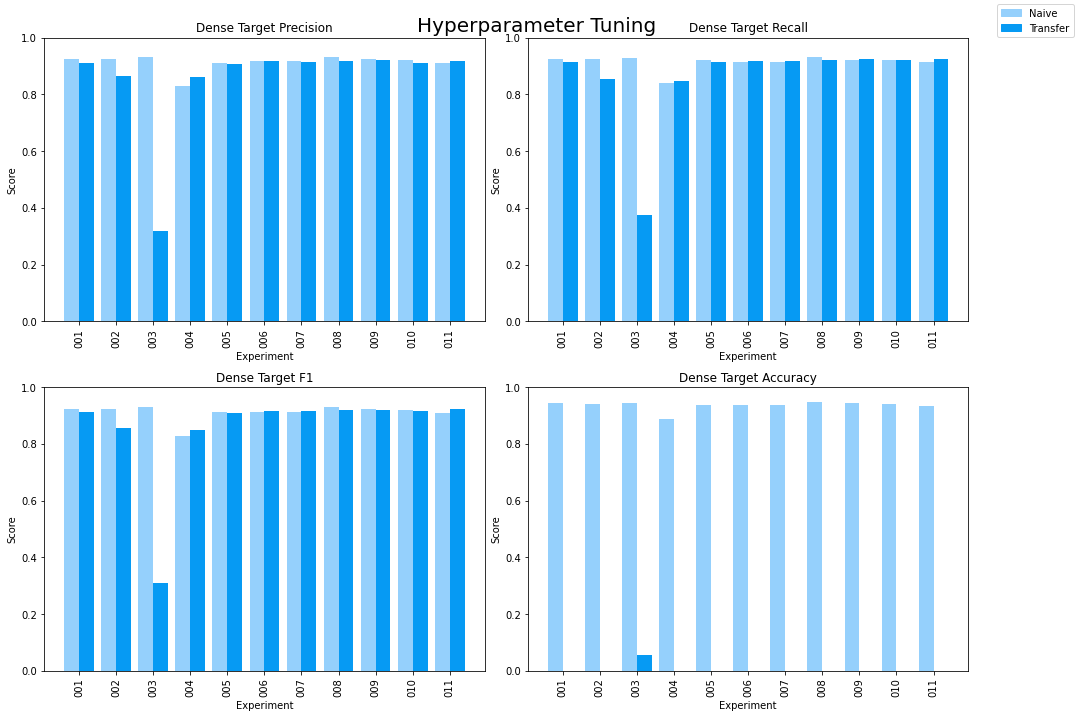

In [ ]:
plot_compare_scores_clustered({k: trackers[k] for k in [keys[0]] + keys[:11]}, "dense", title="Hyperparameter Tuning", save=False)

### Hyperparameters

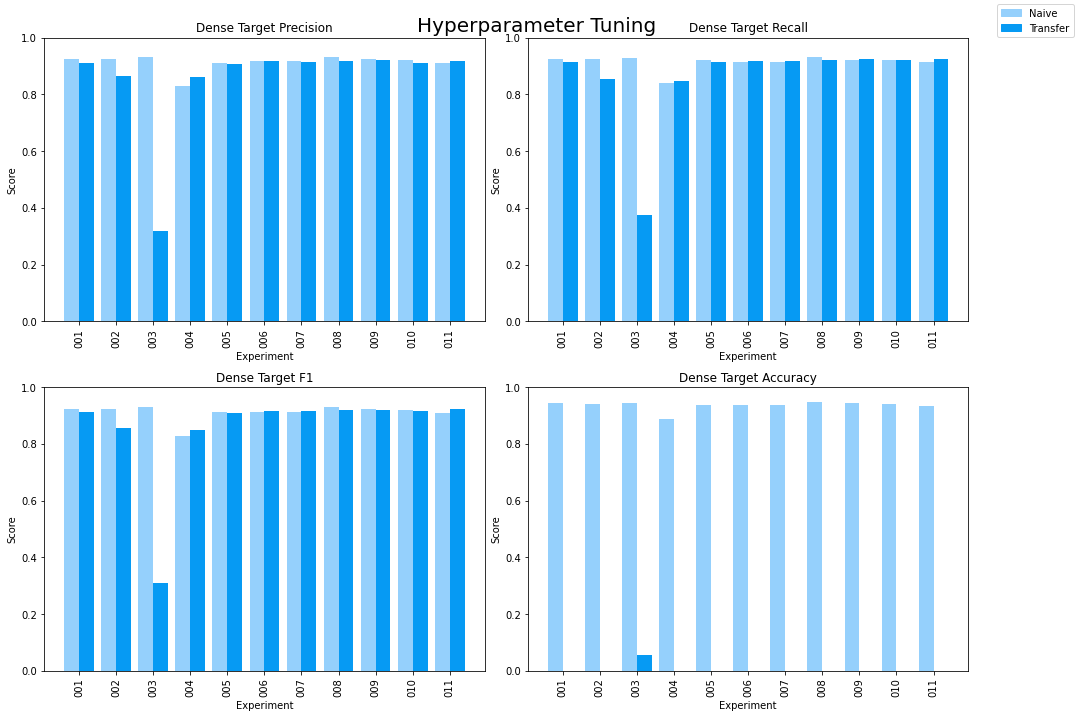

In [ ]:
plot_compare_scores_clustered({k: trackers[k] for k in keys[:11]}, "dense", title="Hyperparameter Tuning", save=True, save_dir=bar_dir, save_name="hyperparameter_tuning")

### Data Ammount

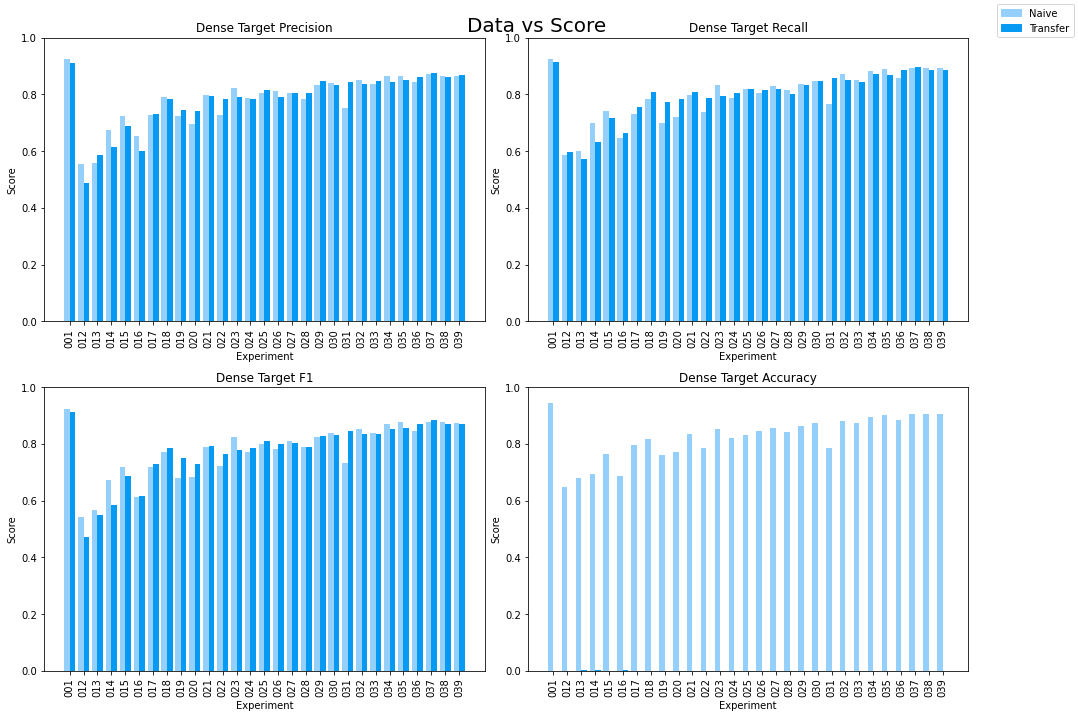

In [ ]:
plot_compare_scores_clustered({k: trackers[k] for k in [keys[0]] + keys[11:]}, "dense", title="Data vs Score", save=True, save_dir=bar_dir, save_name="data_vs_score")

# Compare Histories by Source/Target

## Function

In [ ]:
# Rows: acc val_acc, loss, val_loss
# cols: exp1, exp2, exp3 ...

def plot_comp_hists(vals, a_type, labels, title, save=False, save_dir="", save_name=""):
    # Iterate to plot ==============================================================
    n_rows = len(labels)
    n_cols = 4
    epochs = 20
    height = int(n_rows * 3.3)
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, height))
    for j, mt in enumerate(model_types_plot):
        for i, m in enumerate(hist_metrics):
            for k, exp_name in enumerate(labels):
                
                # Plot values
                ax[k][i].plot(vals[exp_name][a_type][mt][m], color=colors[j])

                # Plot labels
                ax[k][i].set_xticks(np.arange(int(epochs*2)))
                ax[k][i].set_xlabel("Epoch")
                ax[k][i].set_ylabel("Score")
                ax[k][i].set_title(" ".join([a_type.capitalize(), hist_metrics_title[i].capitalize(), exp_name.split("_")[0].capitalize()]))

    # Plot limits ==============================================================

    # Get values ---------------------------------------------------------------
    loss = [None, None]
    for i in range(n_rows):
        for j in range(2, 4):

            # Loss min
            if loss[0] is None:
                loss[0] = ax[i][j].get_ylim()[0]
            elif loss[0] > ax[i][j].get_ylim()[0]:
                loss[0] = ax[i][j].get_ylim()[0]

            # Loss max
            if loss[1] is None:
                loss[1] = ax[i][j].get_ylim()[1]
            elif loss[1] < ax[i][j].get_ylim()[1]:
                loss[1] = ax[i][j].get_ylim()[1]
                
    # Set values ---------------------------------------------------------------
    for i in range(n_rows):
        for j in range(int(n_cols/2)):
            ax[i][j].set_ylim((0, 1))
            ax[i][j+2].set_ylim(loss)
    plt.setp(ax, xlim=(0, epochs*2-1))

    # Plot =====================================================================
    patches = []
    for k, l in enumerate(model_types_plot):
        patches.append(mpatches.Patch(color=colors[k], label=l))
    fig.legend(handles=patches, loc="upper right")
    # fig.suptitle(title, fontsize=20)
    plt.tight_layout()
    fig.subplots_adjust(right=0.9) #, top=0.95)
    if save:
        plt.savefig(save_dir + save_name)
    plt.plot()

# plot_comp_hists(vals, "dense", labels, "Test", save=False)

## Get Values

In [ ]:
# Iterate to get values
vals = {}
n_runs = 5
for exp_name in h:
    if exp_name not in vals:
        vals.update({exp_name: {}})
    for a_type in h[exp_name]:
        if a_type not in vals[exp_name]:
            vals[exp_name].update({a_type: {}})
        for m_type in model_types_df:
            mt = m_type.split("_")[-1]
            if mt not in vals[exp_name][a_type]:
                vals[exp_name][a_type].update({mt: {}})

            # Get averages
            l = len(h[exp_name][a_type][m_type][0].history["loss"])
            avgs = {"accuracy": np.zeros(l).tolist(), 
                    "val_accuracy": np.zeros(l).tolist(),
                    "loss": np.zeros(l).tolist(),
                    "val_loss": np.zeros(l).tolist(),
                    }
            for m in avgs:
                for run in h[exp_name][a_type][m_type]:
                    avgs[m] = [sum(x) for x in zip(avgs[m], h[exp_name][a_type][m_type][run].history[m])]
                avgs[m] = [x/n_runs for x in avgs[m]]
            
                # Combine initial and transfer histories
                if m not in vals[exp_name][a_type][mt]:
                    vals[exp_name][a_type][mt].update({m: None})
                if vals[exp_name][a_type][mt][m] is None:
                    vals[exp_name][a_type][mt][m] = avgs[m]
                else:
                    vals[exp_name][a_type][mt][m] += avgs[m]

## Test

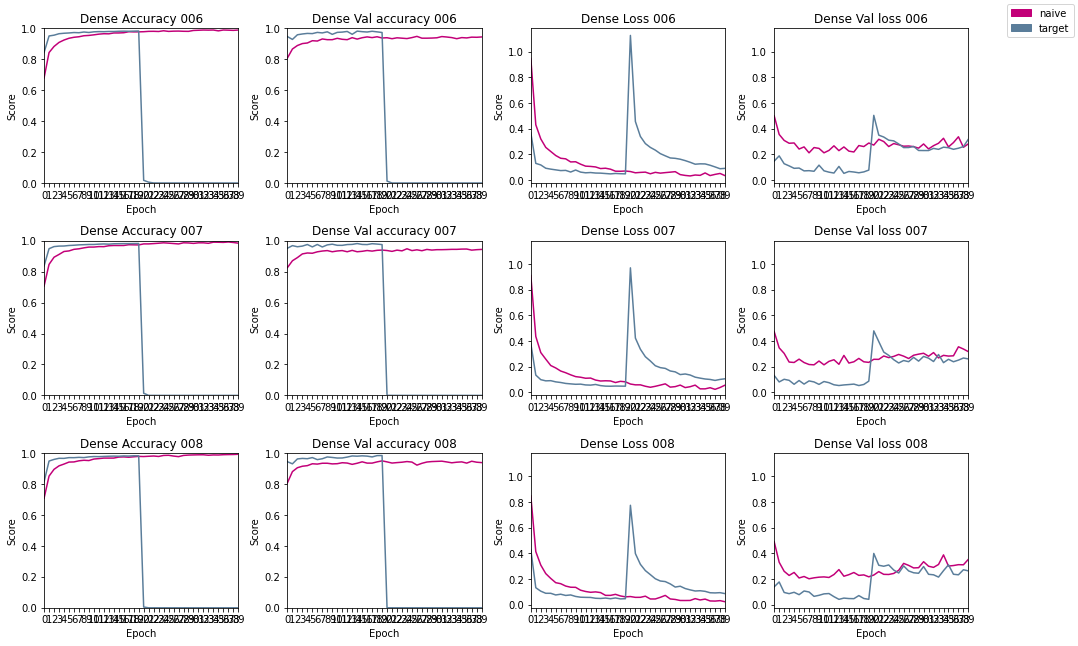

In [ ]:
# Test
keys = labels[5:8]
a_type = "dense"
name = a_type.capitalize() + " Transfer Compare Learning Rate Comparison"
s_name = "000_%s.png"%("_".join(name.split(" ")))
plot_comp_hists(vals, a_type, keys, name, save=False, save_dir=hist_plot_dir, save_name=s_name.lower())

# Plot All Histories

## Function

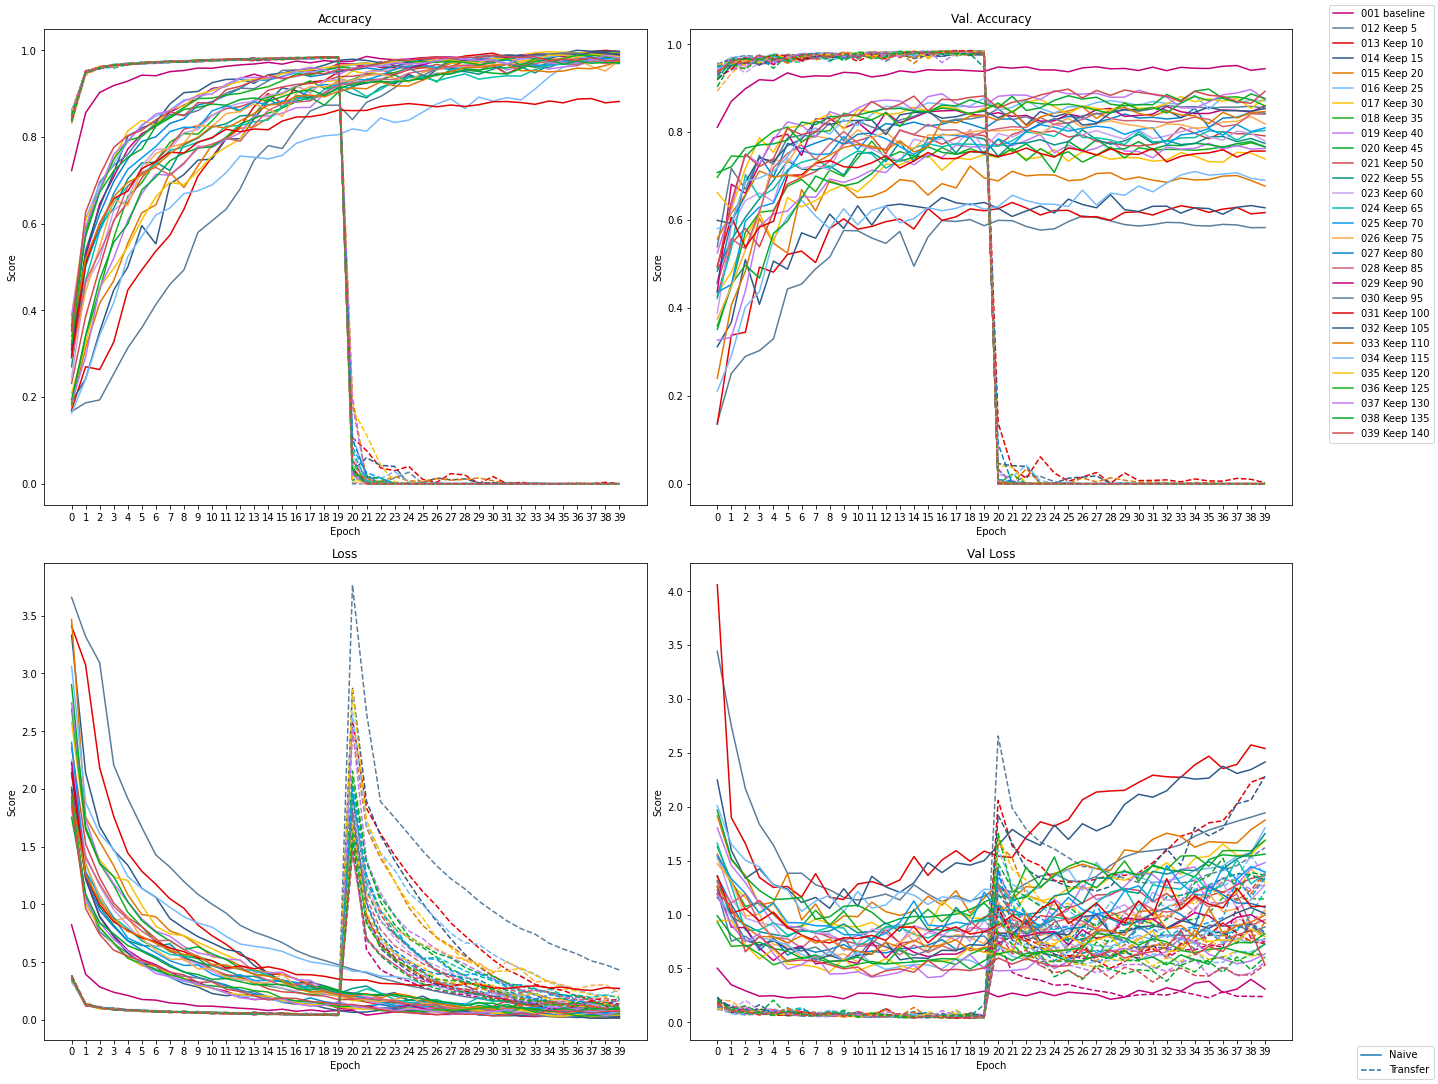

In [78]:
def plot_hists(vals, labels, save=False, save_dir="", save_name=""):
    # Iterate to plot ==============================================================

    # Iterate to build plots
    epochs = 20
    fig, ax = plt.subplots(2, 2, figsize=(20, 15))
    for k, m in enumerate(["accuracy", "val_accuracy", "loss", "val_loss"]):
        i = int(k/2)
        j = k%2
        
        for n, l in enumerate(labels):
            c = n
            while c >= len(colors):
                c -= len(colors)

            # Plot values
            ax[i][j].plot(vals[l]["dense"]["naive"][m], linestyle="solid", color=colors[c])
            ax[i][j].plot(vals[l]["dense"]["initial_target"][m] + vals[l]["dense"]["transfer_target"][m], linestyle="dashed", color=colors[c])

            # Plot labels
            ax[i][j].set_xticks(np.arange(int(epochs*2)))
            ax[i][j].set_xlabel("Epoch")
            ax[i][j].set_ylabel("Score")
            ax[i][j].set_title(hist_metrics_title[k])

    # Legend
    color_patches = []
    for i, l in enumerate(labels):
        k = i
        while k >= len(colors):
            k -= len(colors)
        l = l.split("_")
        l = [l[0], l[-2].capitalize(), l[-1]]
        if i == 0:
            del l[0]
        l = " ".join(l)
        color_patches.append(mlines.Line2D([], [], color=colors[k], label=l))
    dot_patches = [mlines.Line2D([], [], linestyle="solid", label="Naive"), 
                   mlines.Line2D([], [], linestyle="dashed", label="Transfer")
                   ]
    fig.legend(handles=color_patches, loc="upper right")
    fig.legend(handles=dot_patches, loc="lower right")

    # Adjust spacing
    plt.tight_layout()
    plt.subplots_adjust(right=0.9)

    if save:
        plt.savefig(save_dir + save_name)
    plt.show()

keys = [x for x in sorted(list(vals.keys()))]
k_new = [keys[0]] + [k for i, k in enumerate(keys) if i % 1 == 0 and i > 10]
plot_hists(vals, k_new)

## Plot

### Evaluate

In [102]:
keys = [x for x in sorted(list(vals.keys()))]

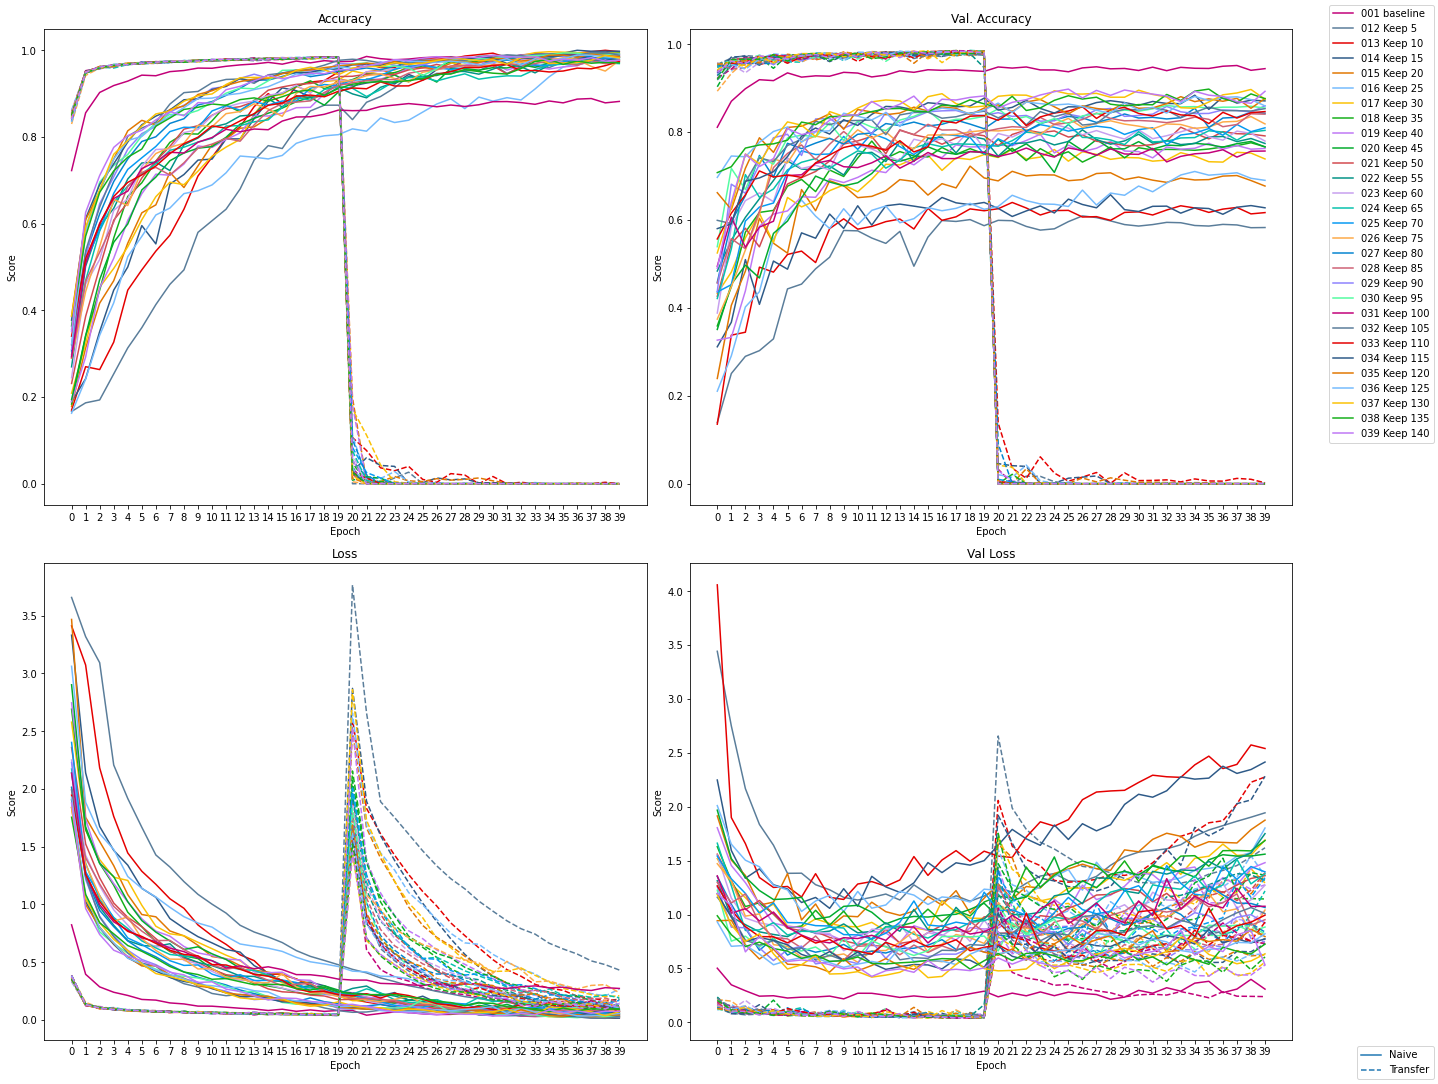

In [103]:
k_new = [keys[0]] + [k for i, k in enumerate(keys) if i % 1 == 0 and i > 10]
plot_hists(vals, k_new)

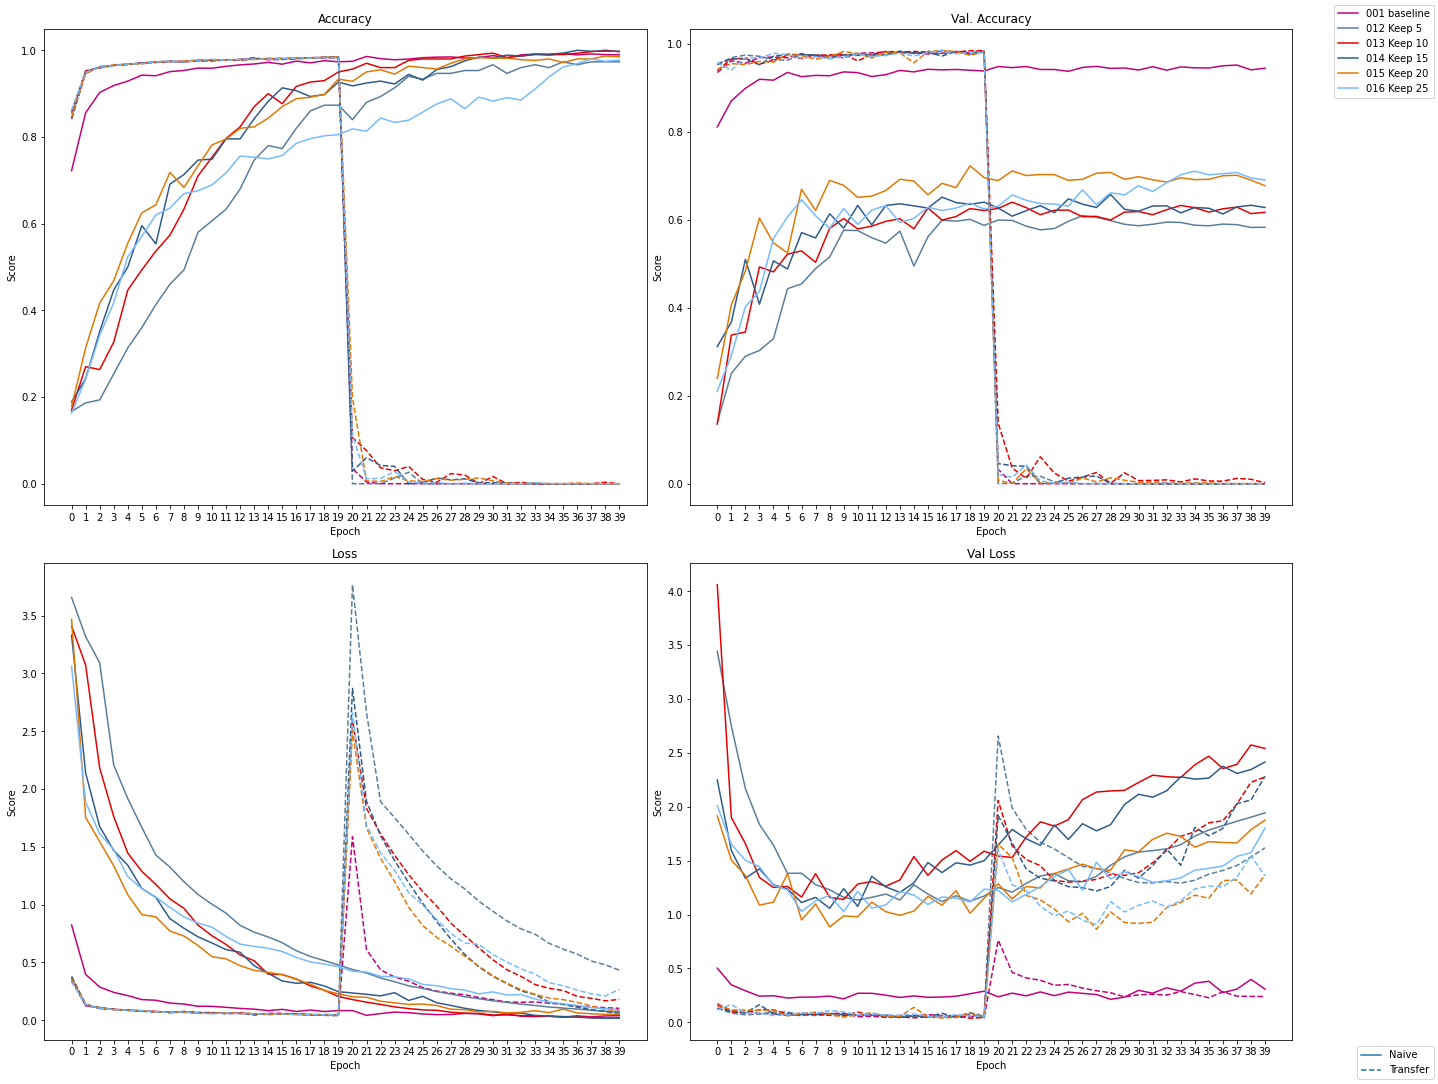

In [104]:
k_new = [keys[0]] + [k for i, k in enumerate(keys) if i % 1 == 0 and i > 10 and i <= 15]
plot_hists(vals, k_new)

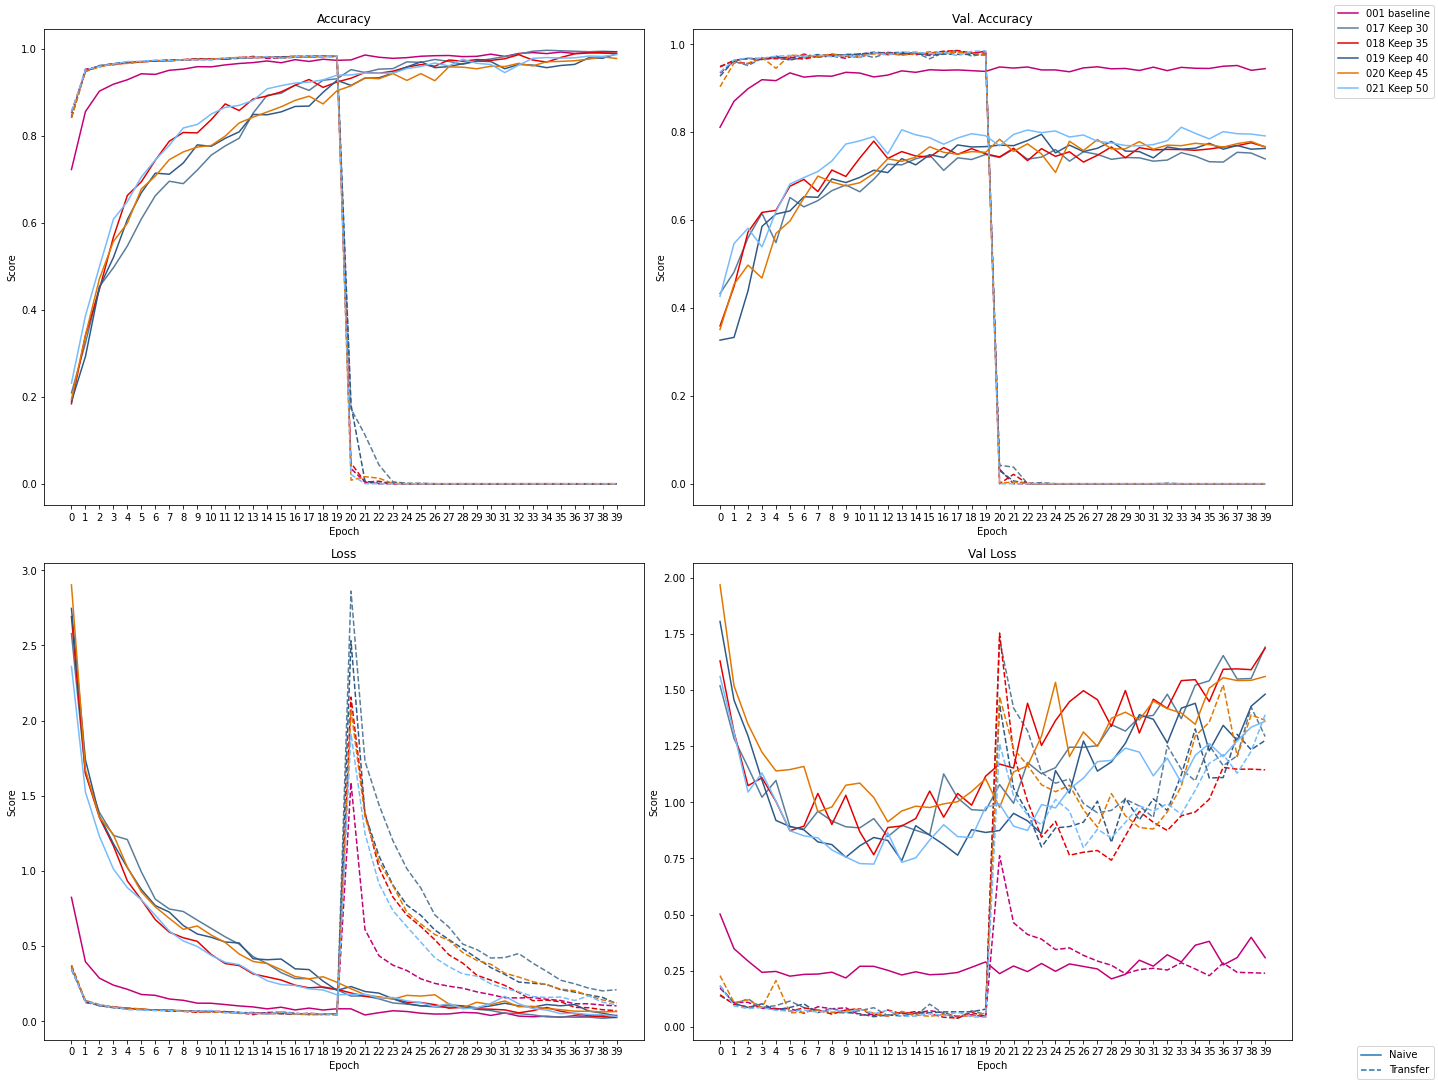

In [105]:
k_new = [keys[0]] + [k for i, k in enumerate(keys) if i % 1 == 0 and i > 15 and i <= 20]
plot_hists(vals, k_new)

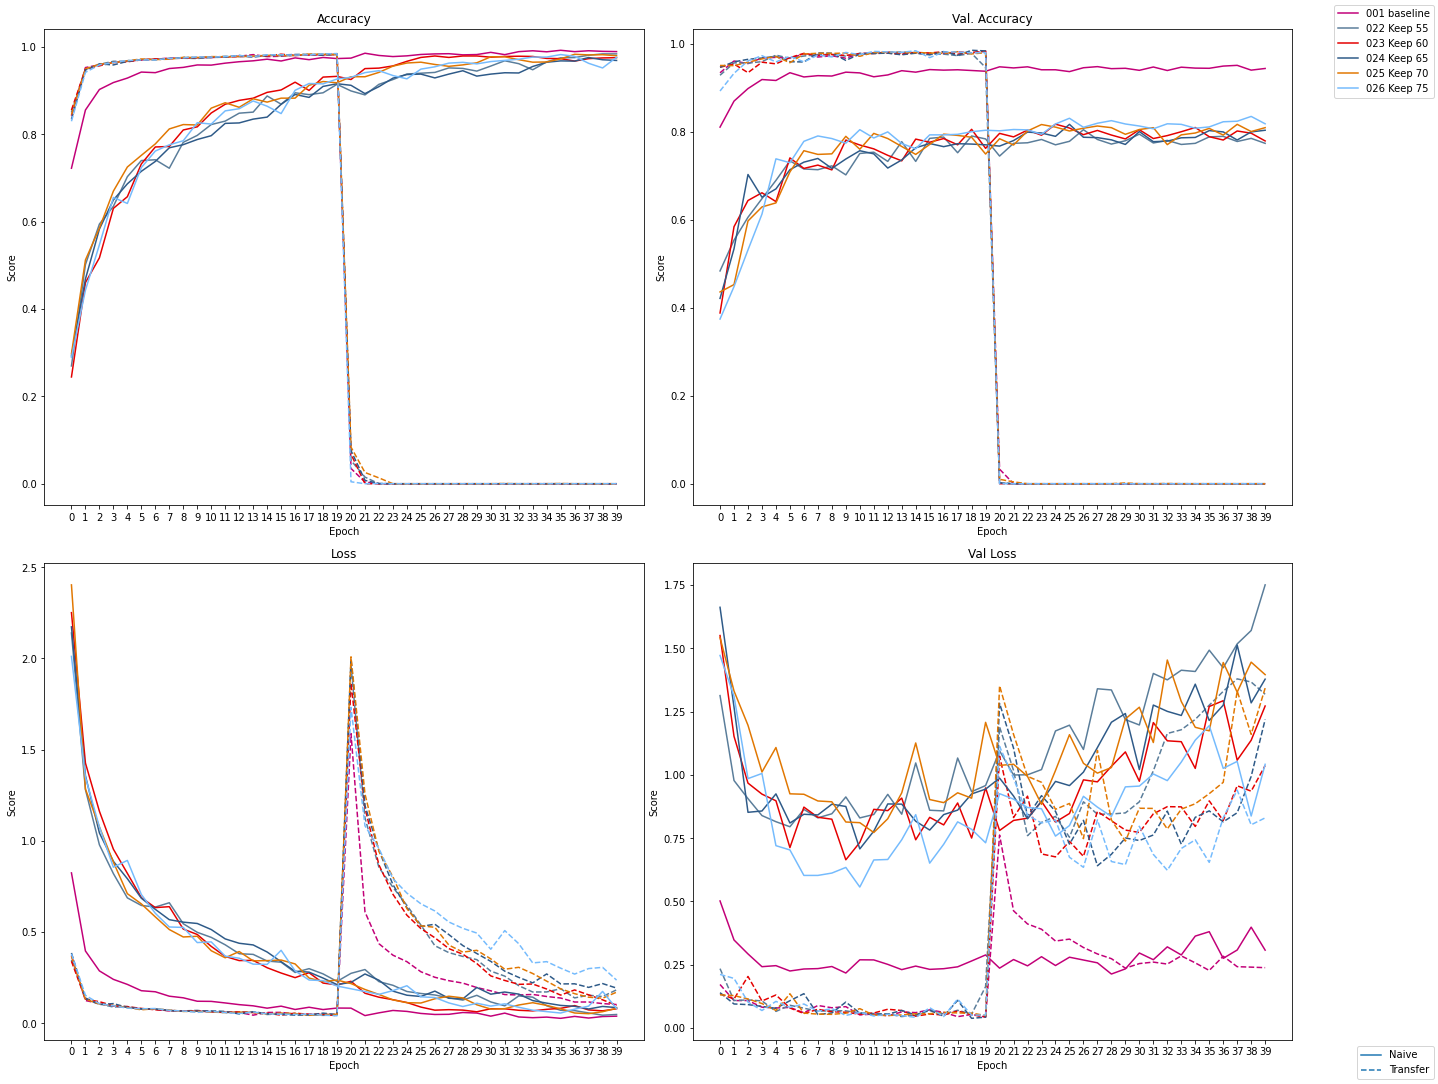

In [106]:
k_new = [keys[0]] + [k for i, k in enumerate(keys) if i % 1 == 0 and i > 20 and i <= 25]
plot_hists(vals, k_new)

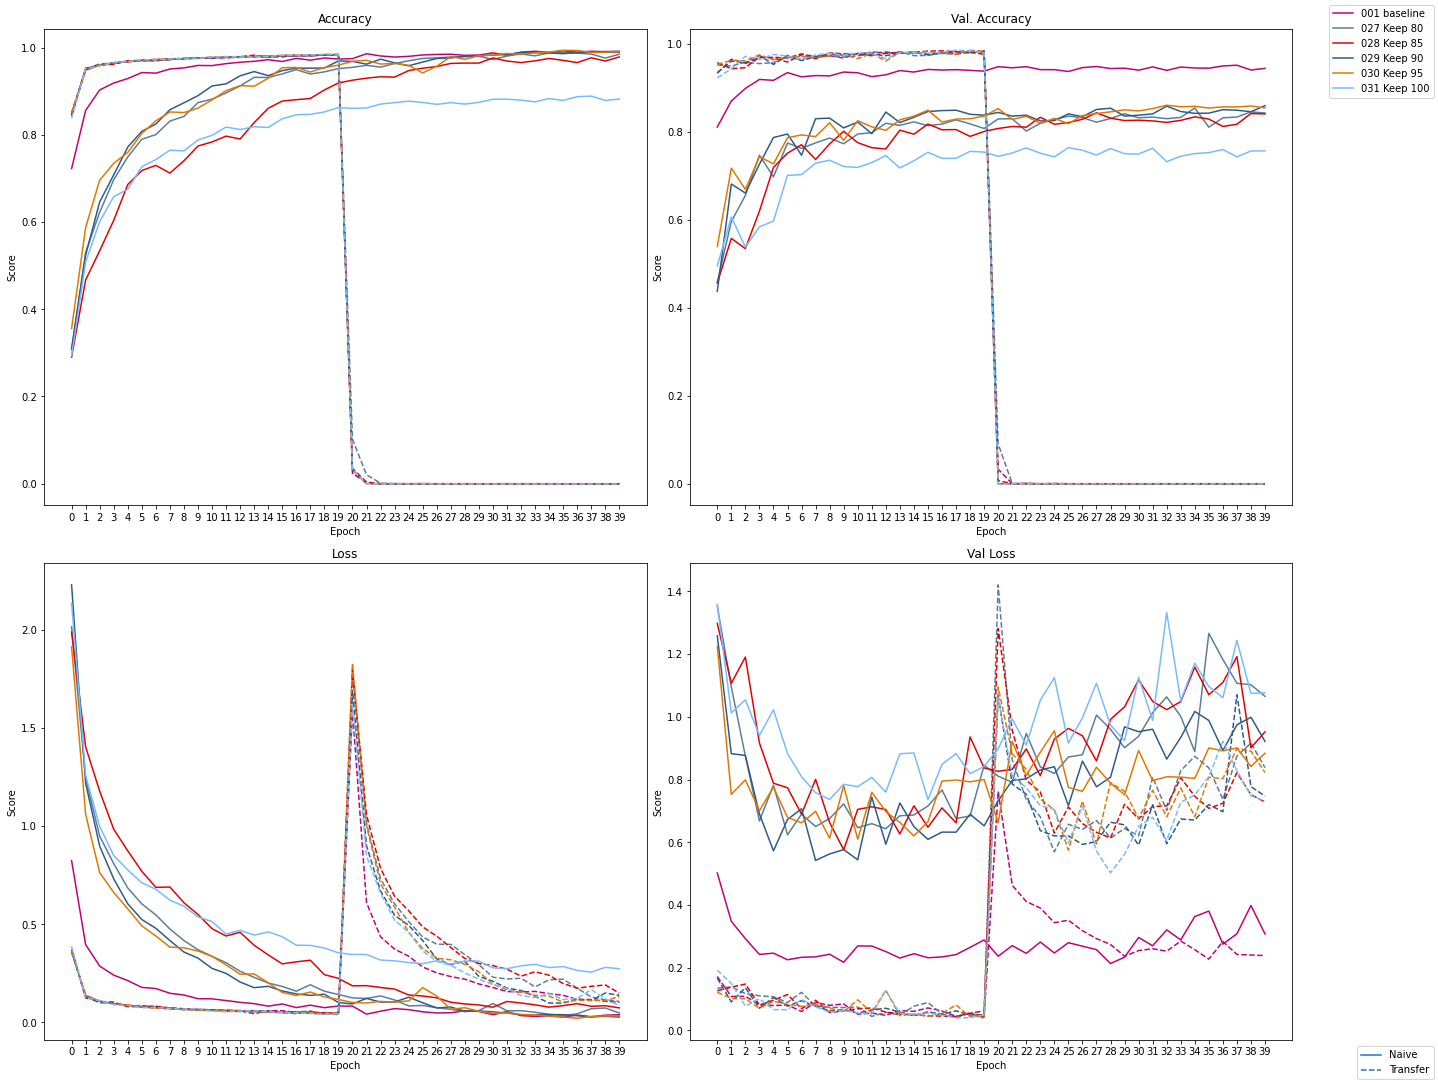

In [107]:
k_new = [keys[0]] + [k for i, k in enumerate(keys) if i % 1 == 0 and i > 25 and i <= 30]
plot_hists(vals, k_new)

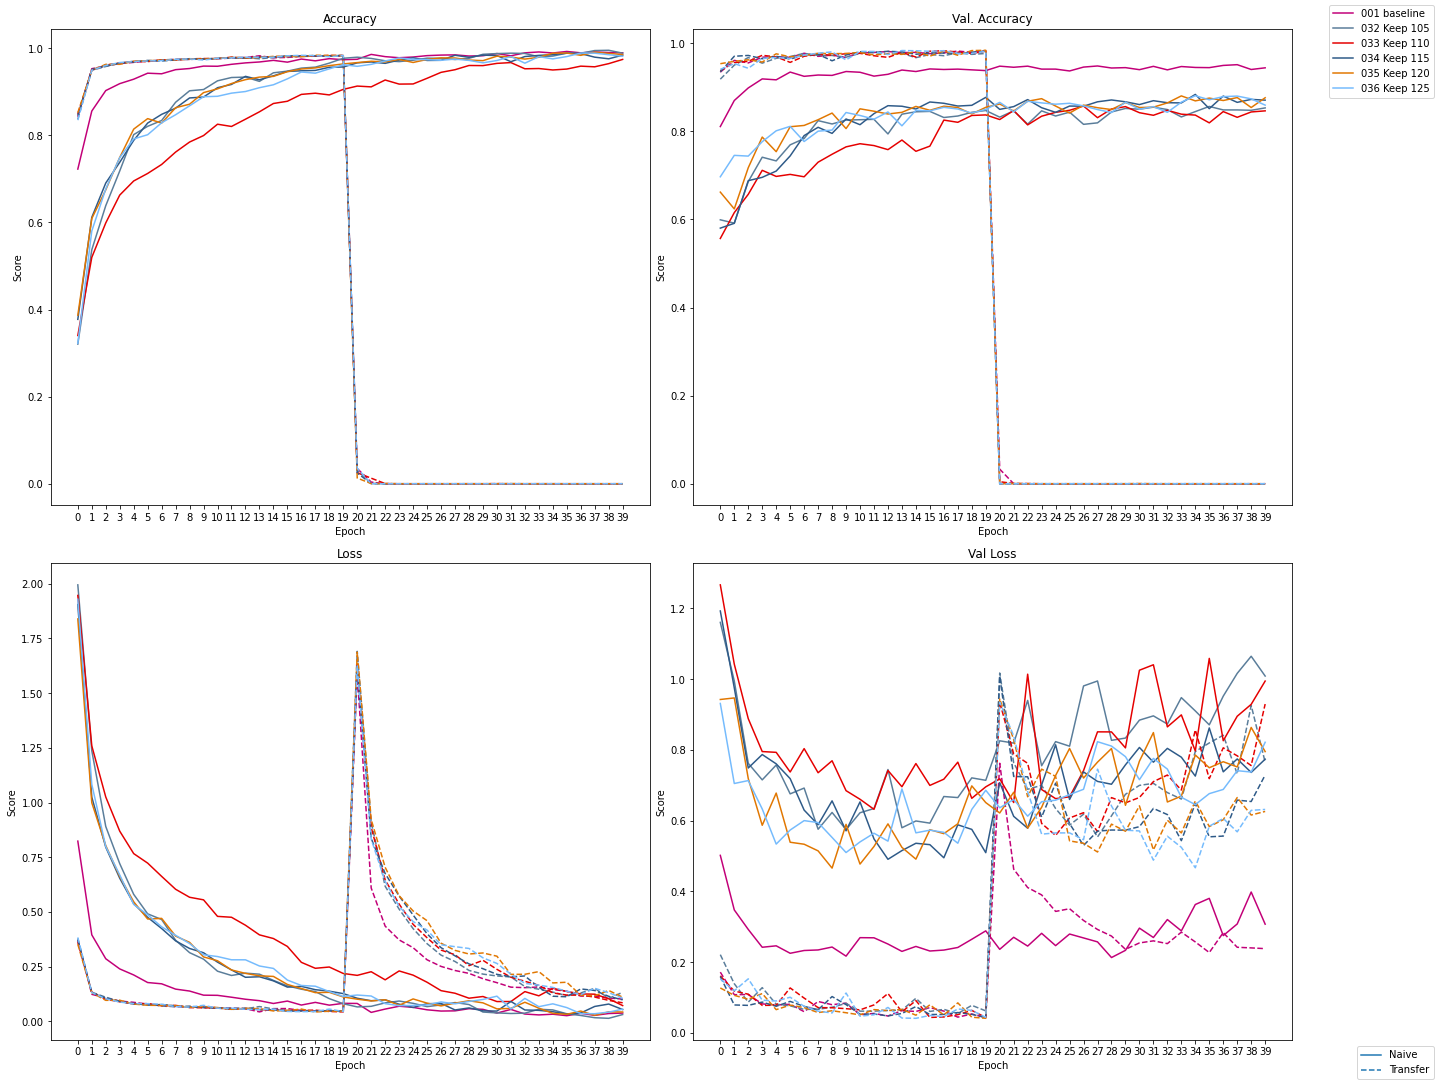

In [108]:
k_new = [keys[0]] + [k for i, k in enumerate(keys) if i % 1 == 0 and i > 30 and i <= 35]
plot_hists(vals, k_new)

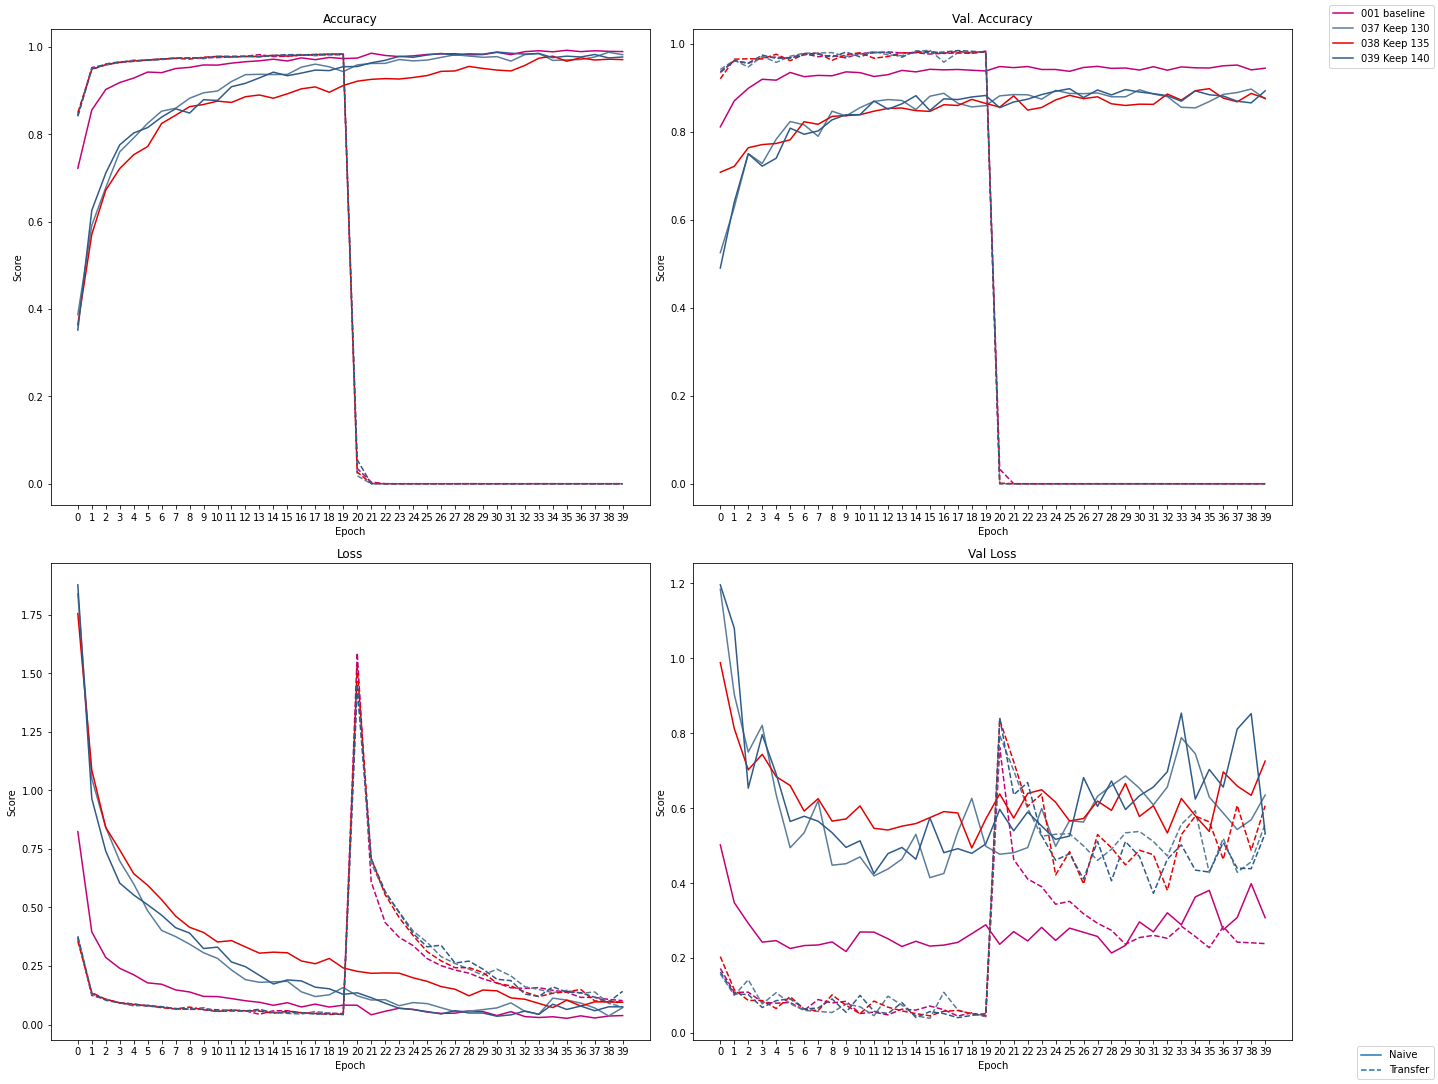

In [109]:
k_new = [keys[0]] + [k for i, k in enumerate(keys) if i % 1 == 0 and i > 35 and i <= 40]
plot_hists(vals, k_new)

### Save

In [110]:
hist_plot_dir

'/content/drive/MyDrive/Classes/CSCE 5280 AI for Wearables/Group Project 2/Results/hist_plots/'

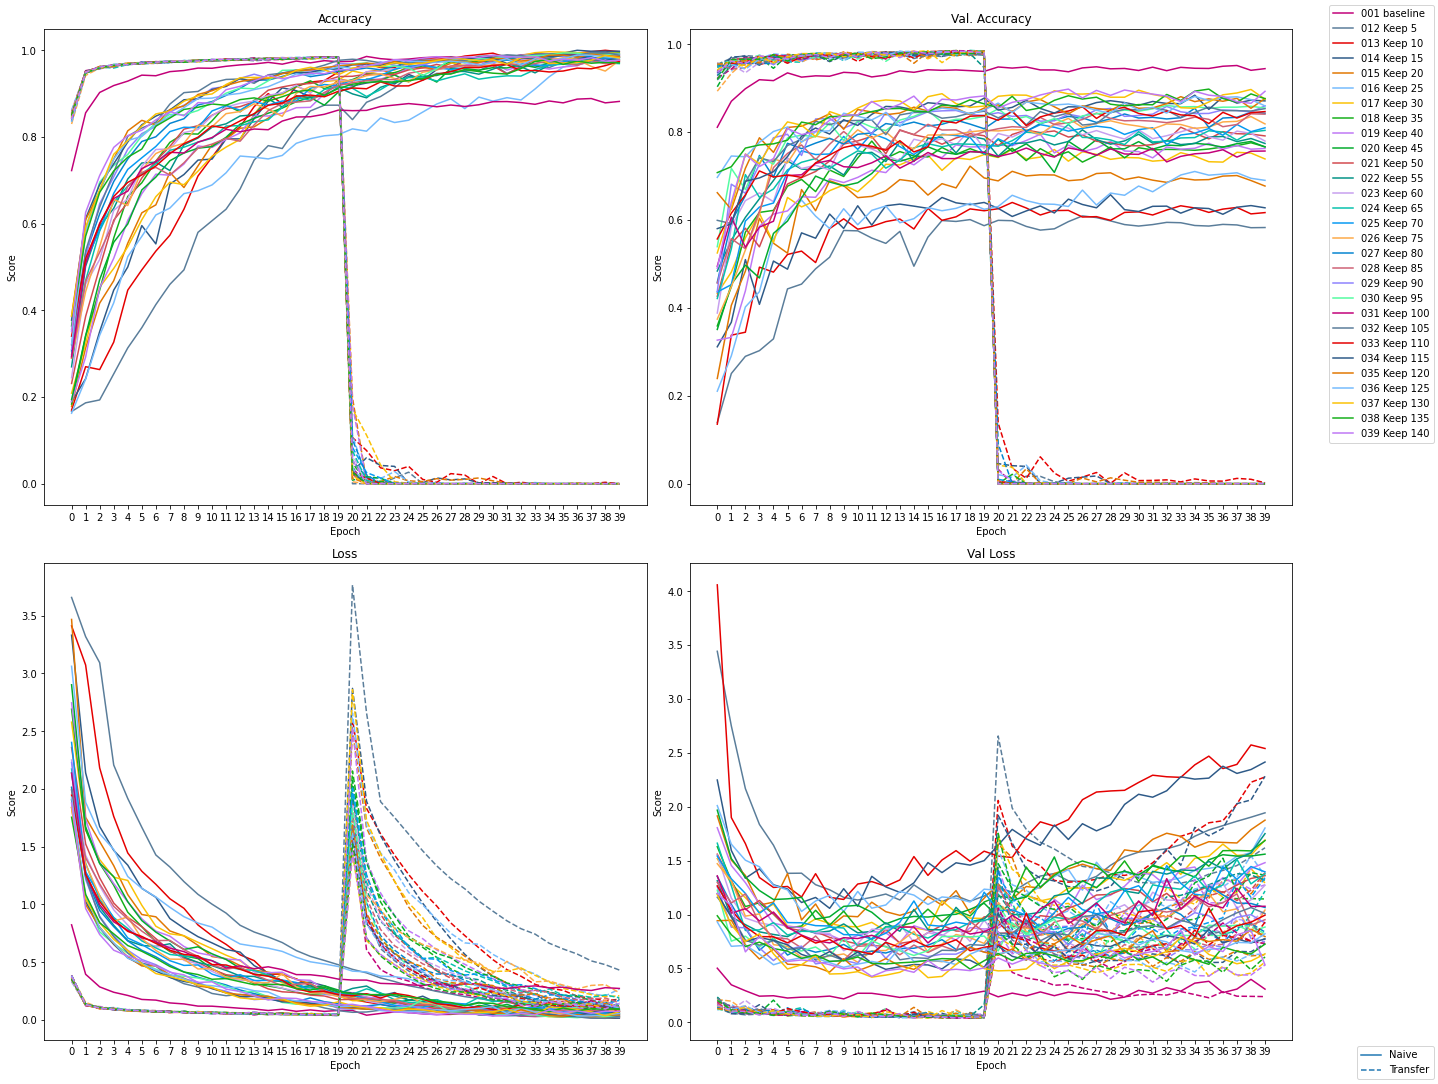

In [111]:
# All at once
k_new = [keys[0]] + [k for i, k in enumerate(keys) if i % 1 == 0 and i > 10]
plot_hists(vals, k_new, save=True, save_dir=hist_plot_dir, save_name="000_all.png")

In [112]:
# Iterate, save 5
c = 1
s = 10
e = 15
a = 5
stop = False
while stop is False:
    if e > len(keys):
        e = len(keys) - 1
        stop = True
    f_num = str(c)
    f_num = f_num.rjust(3, "0")
    f_name = "_".join([f_num, "exps", str(s+2), "to", str(e+1)]) + ".png"

    k_new = [keys[0]] + [k for i, k in enumerate(keys) if i % 1 == 0 and i > s and i <= e]
    plot_hists(vals, k_new, save=True, save_dir=hist_plot_dir, save_name=f_name)

    c += 1
    s += a
    e += a

Output hidden; open in https://colab.research.google.com to view.

# Bottom